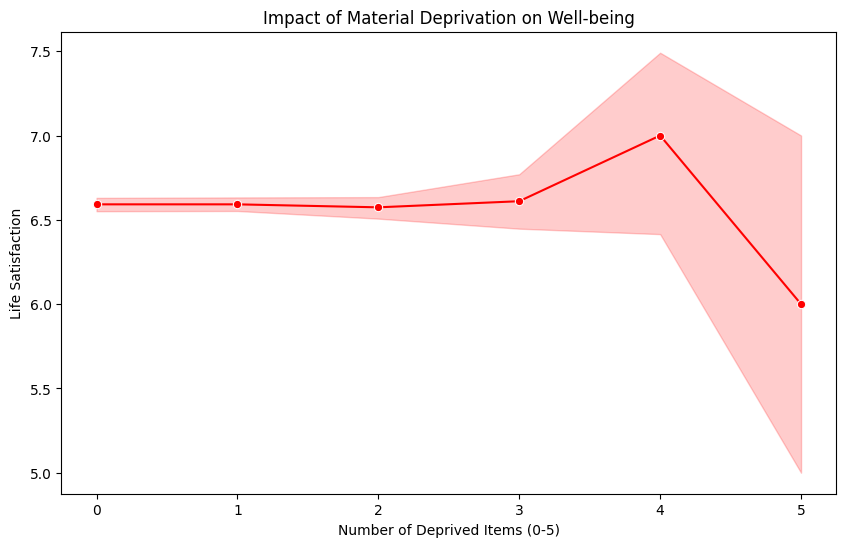

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('IT_2013p_EUSILC.csv')
df_clean = df.copy()
df_clean['Life_Sat'] = df_clean['PW010'].replace(99, np.nan) # Target

# 3. Material Deprivation Index (PD Variables)
# Count how many items (Clothes, Shoes, Leisure) the person "Cannot Afford" (Code 2)
dep_vars = ['PD020', 'PD030', 'PD050', 'PD060', 'PD070']
# Create binary flags (1 if Deprived, 0 otherwise)
for col in dep_vars:
    df_clean[f'{col}_Deprived'] = (df_clean[col] == 2).astype(int)

df_clean['Deprivation_Index'] = df_clean[[f'{c}_Deprived' for c in dep_vars]].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Deprivation_Index', y='Life_Sat', data=df_clean, marker='o', color='red')
plt.title('Impact of Material Deprivation on Well-being')
plt.xlabel('Number of Deprived Items (0-5)')
plt.ylabel('Life Satisfaction')
plt.show()